In [1]:
# Manage data and statistics
import numpy as np
from numpy.random import default_rng, SeedSequence
import pandas as pd

from scipy import stats
from scipy.stats import norm, skewnorm, yeojohnson, boxcox, zscore
from scipy.stats.mstats import winsorize

# Plot data
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set(style="white")

# Scale variables
from sklearn.preprocessing import scale, StandardScaler
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.preprocessing import maxabs_scale, MaxAbsScaler
from sklearn.preprocessing import robust_scale, RobustScaler

# Transform variables
from sklearn.preprocessing import quantile_transform, QuantileTransformer
from sklearn.preprocessing import power_transform, PowerTransformer

# Encode categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

# Discretize continuous variables
from sklearn.preprocessing import KBinsDiscretizer

# Impute missing values
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
data = {
    'id': [1000, 1001, 1002, 1003, 1004, 1005, 1006],
    'date': pd.date_range('4/25/2020', periods=7, freq='D'),
    'age': [21, 56, 33, 48, 27, 42, 32],
    'income': [67000, 220000, 97000, 166000, 81000, 157000, 96000],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female'],
    'education': ['Bachelors', 'PhD', 'Masters', 'Masters', 'Bachelors', 'Bachelors', 'Bachelors'], 
    'passed': [False, True, True, True, False, False, True],
    'measurement': np.random.randn(7).round(2)
}

df = pd.DataFrame(data)
df

,id,date,age,income,gender,education,passed,measurement
0,1000,2020-04-25,21,67000,Male,Bachelors,False,0.54
1,1001,2020-04-26,56,220000,Female,PhD,True,-0.13
2,1002,2020-04-27,33,97000,Female,Masters,True,-0.08
3,1003,2020-04-28,48,166000,Male,Masters,True,-0.04
4,1004,2020-04-29,27,81000,Male,Bachelors,False,0.88
5,1005,2020-04-30,42,157000,Female,Bachelors,False,-0.59
6,1006,2020-05-01,32,96000,Female,Bachelors,True,0.69


In [3]:
# Insert missing values into the dataset
df2 = df.copy()
df2.iloc[[3, 5], [2, 4, 5, 6, 7]] = np.nan
df2

,id,date,age,income,gender,education,passed,measurement
0,1000,2020-04-25,21.0,67000,Male,Bachelors,False,0.54
1,1001,2020-04-26,56.0,220000,Female,PhD,True,-0.13
2,1002,2020-04-27,33.0,97000,Female,Masters,True,-0.08
3,1003,2020-04-28,NaN,166000,NaN,NaN,NaN,NaN
4,1004,2020-04-29,27.0,81000,Male,Bachelors,False,0.88
5,1005,2020-04-30,NaN,157000,NaN,NaN,NaN,NaN
6,1006,2020-05-01,32.0,96000,Female,Bachelors,True,0.69


## 1a. Create indicator variable for missing values in `age` column
## 1b. Fill in missing values in `age` column using `pandas`

## 2. Fill in missing values in `age` column using `scikit-learn`

## 3a. Create indicator variable for missing values in `education` column
## 3b. Fill in missing values in `education` column using `pandas`

## 4. Fill in missing values in `education` column using `scikit-learn`

## 5. Create dummy variables based on the `education` column using `pandas`

## 6. Create dummy variables based on the `education` column using `scikit-learn`

## 7a. Create a centered and scaled version of the `age` column using `pandas`
## 7b. Plot the two distributions, original and centered & scaled, side-by-side 

### Random normal variable

In [4]:
sq1 = np.random.SeedSequence()
sq1.entropy

38607413459892545950960270501917369545

In [5]:
rng = default_rng(sq1.entropy)

In [6]:
vals = norm.rvs(loc=55, scale=3, size=1000, random_state=rng)

np.round(vals.mean(), 2), np.round(vals.std(), 2)

(54.85, 3.06)

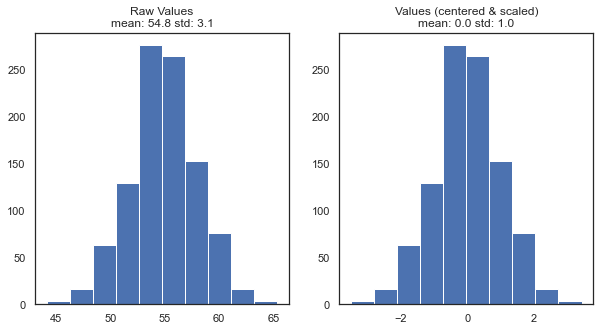

In [7]:
fig, axs = plt.subplots(figsize=(10, 5), ncols=2)

axs[0].hist(vals)
axs[0].set_title('Raw Values\nmean: {:.1f} std: {:.1f}'.format( vals.mean(), vals.std() ))

vals_cs = (vals - vals.mean()) / vals.std()

axs[1].hist(vals_cs)
axs[1].set_title('Values (centered & scaled)\nmean: {:.1f} std: {:.1f}'.format( abs(vals_cs.mean()), vals_cs.std() ));

## 8a. Transform skewed distribution to Gaussian using `ladder of powers`
## 8b. Plot the distributions side-by-side

In [8]:
r = pd.Series(skewnorm.rvs(a=4, loc=10, scale=4, size=1000))

r[:10]

0    17.595735
1    17.678107
2    11.898134
3    10.997031
4    14.256844
5    11.346502
6    16.987890
7    13.365531
8    12.865670
9    14.518134
dtype: float64

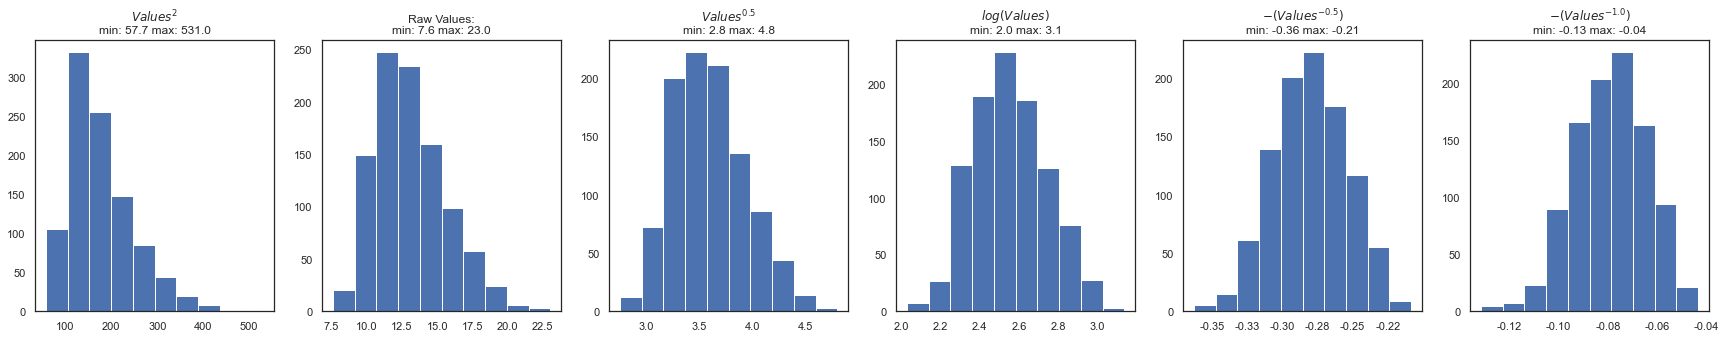

In [9]:
fig, axs = plt.subplots(figsize=(30, 5), ncols=6)

axs[0].hist(np.power(r, 2))
axs[0].set_title('$Values^2$\nmin: {:.1f} max: {:.1f}'.format(np.min(np.power(r, 2)), np.max(np.power(r, 2))))

x_min, x_max = np.min(-np.power(r, -0.5)), np.max(r)

axs[1].hist(r)
axs[1].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1].set_title('Raw Values:\nmin: {:.1f} max: {:.1f}'.format(np.min(r), np.max(r)))

axs[2].hist(np.power(r, 0.5))
axs[2].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2].set_title('$Values^{0.5}$'+'\nmin: {0:.1f} max: {1:.1f}'.format(np.min(np.power(r, 0.5)), np.max(np.power(r, 0.5))))

axs[3].hist(np.log(r))
axs[3].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3].set_title('$log(Values)$\nmin: {:.1f} max: {:.1f}'.format(np.min(np.log(r)), np.max(np.log(r))))

axs[4].hist(-np.power(r, -0.5))
axs[4].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[4].set_title('$-(Values^{-0.5})$'+'\nmin: {:.2f} max: {:.2f}'.format(np.min(-np.power(r, -0.5)), np.max(-np.power(r, -0.5))))

axs[5].hist(-(1/r))
axs[5].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[5].set_title('$-(Values^{-1.0})$'+'\nmin: {:.2f} max: {:.2f}'.format(np.min(-(1/r)), np.max(-(1/r))));

## 9a. Transform skewed distribution to Gaussian using `scipy`
## 9b. Plot the distributions, original and transformed, side-by-side

In [10]:
s = pd.Series(skewnorm.rvs(a=4, loc=10, scale=4, size=1000))

s[:10]

0    18.844065
1    15.276644
2    19.255244
3    16.840954
4    11.397323
5    15.033400
6    12.447398
7     9.966767
8    10.289226
9     8.905498
dtype: float64

## 10a. Transform skewed distribution to Gaussian using `scikit-learn`
## 10b. Plot the two distributions, original and transformed, side-by-side

In [11]:
t = pd.Series(skewnorm.rvs(a=4, loc=10, scale=4, size=1000))

t[:10]

0    10.685656
1    14.481287
2    14.528670
3    16.334342
4     8.868170
5    10.672253
6    12.391989
7    14.058592
8    13.244864
9    11.052092
dtype: float64